# Import and install dependencies

In [ ]:
!pip install tensorflow==2.4.1

In [ ]:
!pip install opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 1,circle_radius=2),
                             mp_drawing.DrawingSpec(color=(155,109,116), thickness = 1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(155,109,116), thickness = 2,circle_radius=3)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(155,109,116), thickness = 2,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(155,109,116), thickness = 2,circle_radius=1)
                             )

In [7]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)

        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break gracefully
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    print("frame size: "+ str(frame.size))

frame size: 921600


In [22]:
len(results.left_hand_landmarks.landmark)

21

## Detecting from a video

In [8]:
import os,sys

In [16]:
cap = cv2.VideoCapture(os.path.join('test.mp4'))

In [17]:
ret, frame = cap.read()

In [8]:
def write_video(file_path, frames, fps):
    """
    Writes frames to an mp4 video file
    :param file_path: Path to output video, must end with .mp4
    :param frames: List of PIL.Image objects
    :param fps: Desired frame rate
    """

    w, h = frames[0].size
    fourcc = cv.VideoWriter_fourcc('m', 'p', '4', 'v')
    writer = cv.VideoWriter(file_path, fourcc, fps, (w, h))

    for frame in frames:
        writer.write(pil_to_cv(frame))

    writer.release() 

In [11]:
frame.shape

(1080, 1920, 3)

In [21]:
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', '2')
writer = cv2.VideoWriter('test3.mp4', fourcc, 10, (921, 600))

cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)

        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        #export to video
        writer.write(image)
    
        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break gracefully
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    
    cap.release()
    writer.release()
    cv2.destroyAllWindows()

In [19]:
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    input_video = 'test'
    video_reader=imageio.get_reader('%s.mp4'%input_video)
    video_writer=imageio.get_writer('%s_annotated.mp4'%input_video,fps =10)
    #loop through each frame
    t0 = datetime.now()
    n_frames = 0
    while video_writer.isOpened():
        for frame in video_reader:
            image_np=frame
            n_frames+=1

            #expanddim since code expects images to have shape[1,None]
            image_np_expanded=np.expand_dims(image_np,axis=0)

            #make detections
            image, results = mediapipe_detection(frame, holistic)

            #draw landmarks
            #draw_landmarks(image, results)
            draw_styled_landmarks(image_np, results)

            #video_writer
            video_writer.append_data(image_np)

        #fps = (n_frames/(datetime.now()-t0).total_seconds()
        #print("Frames processed: %s,Speeed:%s fps" % (n_frames,fps))
        #cleanup
    video_writer.release()

AttributeError: 'Writer' object has no attribute 'isOpened'

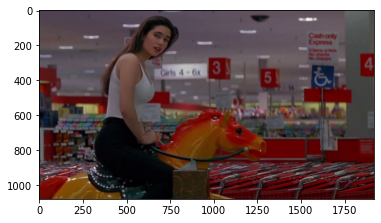

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
cap.release()

In [18]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

337.0

In [19]:
cap.get(cv2.CAP_PROP_FPS)

60.0

In [ ]:
cap.get(cv2.CAP_PROP_